In [1]:
from __future__ import print_function
import os
import zipfile
import plaidml.keras
plaidml.keras.install_backend()
import keras

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
from datetime import datetime


In [3]:
dataRaw = pd.read_csv("Dataset/train.csv")

In [4]:
dataRaw.head(100)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
95,ANSL_70120,2014-06-24 00:00:00,2018-01-19 18:19:00,1.0,Tan,0.21,31.52,0,7,0.0,2
96,ANSL_71504,2016-07-04 00:00:00,2016-11-25 18:46:00,0.0,Blue Tabby,0.11,42.76,0,1,1.0,1
97,ANSL_71993,2012-07-21 00:00:00,2017-08-05 17:34:00,0.0,Chocolate,0.84,22.98,0,7,1.0,2
98,ANSL_69762,2013-12-27 00:00:00,2018-10-05 15:59:00,0.0,Black,0.09,8.86,0,1,1.0,1


In [5]:
(dataRaw.head()).isnull()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [6]:
meanOfCondition=(dataRaw["condition"]).mean()

In [6]:
dataRaw["condition"].fillna(value=3,inplace=True)


In [7]:
dataRaw["condition"].fillna(np.around(meanOfCondition),inplace=True)

In [28]:
dataRaw

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,3.0,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2017-01-26 00:00:00,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1,0.0,2
18830,ANSL_59900,2016-06-18 00:00:00,2017-07-09 08:37:00,3.0,Brown,0.73,14.25,15,4,2.0,4
18831,ANSL_53210,2010-07-21 00:00:00,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9,1.0,1
18832,ANSL_63468,2017-05-12 00:00:00,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1.0,2


In [29]:
date2=dataRaw["issue_date"]
date1=dataRaw["listing_date"]

In [30]:
#helper functions for finding the difference in the date
def foo(l, dtype=int):
    return list(map(dtype, l))

def to_integer(dt_time):
    return 10000*dt_time[0] + 100*dt_time[1] + dt_time[2]

date2List=[]
def date2Converter(dateObject):
    for i in dateObject:
        date = datetime.strptime(i, '%Y-%m-%d %H:%M:%S')
        date2List.append(date)
dateList=[]
def dateConverter(dateObject):
    for i in dateObject:
        date = datetime.strptime(i, '%Y-%m-%d %H:%M:%S')
        dateList.append(date)
dateTestList=[]
def dateTConverter(dateObject):
    for i in dateObject:
        date = datetime.strptime(i, '%Y-%m-%d %H:%M:%S')
        dateTestList.append(date)
dateTest2List=[]
def dateT2Converter(dateObject):
    for i in dateObject:
        date = datetime.strptime(i, '%Y-%m-%d %H:%M:%S')
        dateTest2List.append(date)
diffDateList=[]
def diff_in_date(dateList,date2List):
    for i,j in zip(dateList,date2List):
        days=(i-j).days
        diffDateList.append(days)
diffDateListTest=[]
def diff_in_dateT(dateList,date2List):
    for i,j in zip(dateList,date2List):
        days=(i-j).days
        diffDateListTest.append(days)

In [31]:
dateConverter(date1)
date2Converter(date2)

In [32]:
diff_in_date(dateList,date2List)

In [34]:
len(diffDateList)

18834

In [35]:
colours=dataRaw["color_type"].unique()
colours
a=np.arange(0,56)
coloursDict=dict(zip(colours,a))

In [55]:
dataCut = dataRaw
dataCut=dataCut.drop(['issue_date','listing_date','pet_id'],axis=1)
XdataSet = dataCut.iloc[:,0:6]
YdataSet=dataCut.iloc[:,6:8]

In [56]:
dataCut

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,1.0,White,0.72,14.19,13,9,0.0,2
2,3.0,Brown,0.15,40.90,15,4,2.0,4
3,1.0,White,0.62,17.82,0,1,0.0,2
4,2.0,Black,0.50,11.06,18,4,0.0,1
...,...,...,...,...,...,...,...,...
18829,2.0,Tricolor,0.44,27.36,0,1,0.0,2
18830,3.0,Brown,0.73,14.25,15,4,2.0,4
18831,0.0,Calico Point,0.99,28.13,13,9,1.0,1
18832,0.0,Tan,0.55,44.82,13,9,1.0,2


In [57]:
XdataSet

,condition,color_type,length(m),height(cm),X1,X2
0,2.0,Brown Tabby,0.80,7.78,13,9
1,1.0,White,0.72,14.19,13,9
2,3.0,Brown,0.15,40.90,15,4
3,1.0,White,0.62,17.82,0,1
4,2.0,Black,0.50,11.06,18,4
...,...,...,...,...,...,...
18829,2.0,Tricolor,0.44,27.36,0,1
18830,3.0,Brown,0.73,14.25,15,4
18831,0.0,Calico Point,0.99,28.13,13,9
18832,0.0,Tan,0.55,44.82,13,9


In [16]:
YdataSet

,breed_category,pet_category
0,0.0,1
1,0.0,2
2,2.0,4
3,0.0,2
4,0.0,1
...,...,...
18829,0.0,2
18830,2.0,4
18831,1.0,1
18832,1.0,2


In [39]:
info = pd.DataFrame()
info['length(m)'] = [np.percentile(XdataSet['length(m)'],25*i) for i in range(1,4)]
info['height(cm)'] = [np.percentile(XdataSet['height(cm)'],25*i) for i in range(1,4)]
info['duration'] = [np.percentile(XdataSet['diffDate'],25*i) for i in range(1,4)]
info

,length(m),height(cm),duration
0,0.25,16.1725,119.0
1,0.50,27.3400,392.0
2,0.76,38.8900,1117.0


In [40]:
info.loc[3] = [2.5*info.loc[0,column] - 1.5*info.loc[2,column] for column in info.columns]
info.loc[4] = [2.5*info.loc[2,column] - 1.5*info.loc[0,column] for column in info.columns]
info

,length(m),height(cm),duration
0,0.250,16.17250,119.0
1,0.500,27.34000,392.0
2,0.760,38.89000,1117.0
3,-0.515,-17.90375,-1378.0
4,1.525,72.96625,2614.0


In [41]:
def range_part(column,value):
    if value > info.loc[4,column]:
        return 5
    elif value > info.loc[2,column]:
        return 4
    elif value > info.loc[1,column]:
        return 3
    elif value > info.loc[0,column]:
        return 2
    elif value > info.loc[3,column]:
        return 1
    else:
        return 0

In [42]:
numerical = XdataSet.dtypes[XdataSet.dtypes != object].index

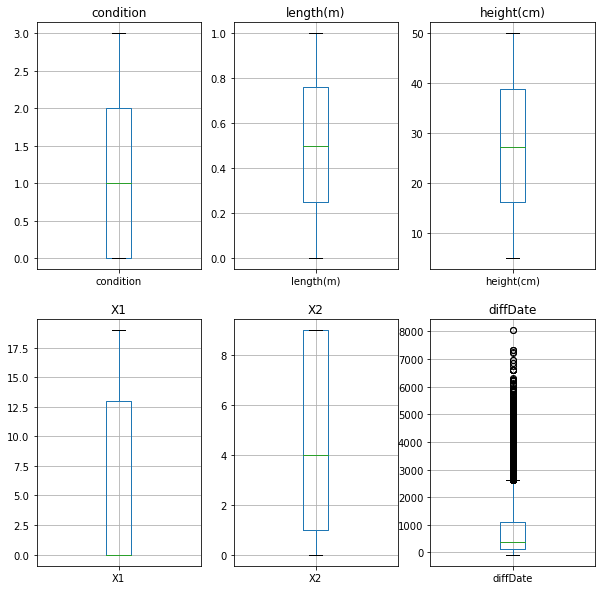

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,3,figsize=(10,10))

for i in range(3):
    XdataSet.boxplot(column=list(numerical)[i], ax=ax[0,i])
    ax[0,i].title.set_text(numerical[i])

for i in range(3):
    XdataSet.boxplot(column=list(numerical)[i+3], ax=ax[1,i])
    ax[1,i].title.set_text(numerical[3+i])

In [61]:
dataset=XdataSet

In [62]:
from tqdm import tqdm
tqdm.pandas()
dataset['length_range'] = dataset['length(m)'].progress_apply(lambda x:range_part('length(m)',x))
dataset['height_range'] = dataset['height(cm)'].progress_apply(lambda x:range_part('height(cm)',x))
dataset['duration_range'] = dataset['diffDate'].progress_apply(lambda x:range_part('duration',x))
dataset

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18834/18834 [00:01<00:00, 14398.00it/s]


,condition,color_type,length(m),height(cm),X1,X2,diffDate,length_range,height_range,duration_range
0,2.0,Brown Tabby,0.80,7.78,13,9,73,4,1,1
1,1.0,White,0.72,14.19,13,9,1862,3,1,4
2,3.0,Brown,0.15,40.90,15,4,752,1,4,3
3,1.0,White,0.62,17.82,0,1,755,3,2,3
4,2.0,Black,0.50,11.06,18,4,52,2,1,1
...,...,...,...,...,...,...,...,...,...,...
18829,2.0,Tricolor,0.44,27.36,0,1,407,2,3,3
18830,3.0,Brown,0.73,14.25,15,4,386,3,1,2
18831,0.0,Calico Point,0.99,28.13,13,9,2954,4,3,5
18832,0.0,Tan,0.55,44.82,13,9,272,3,4,2


In [63]:
from sklearn.preprocessing import LabelEncoder
dataset['color_number'] = LabelEncoder().fit_transform(dataset['color_type'])
dataset = dataset[['condition','length_range','height_range','duration_range','color_number','X1','X2']].fillna(-1)
dataset

,condition,length_range,height_range,duration_range,color_number,X1,X2
0,2.0,4,1,1,18,13,9
1,1.0,3,1,4,53,13,9
2,3.0,1,4,3,15,15,4
3,1.0,3,2,3,53,0,1
4,2.0,2,1,1,2,18,4
...,...,...,...,...,...,...,...
18829,2.0,2,3,3,52,0,1
18830,3.0,3,1,2,15,15,4
18831,0.0,4,3,5,22,13,9
18832,0.0,3,4,2,48,13,9


[]

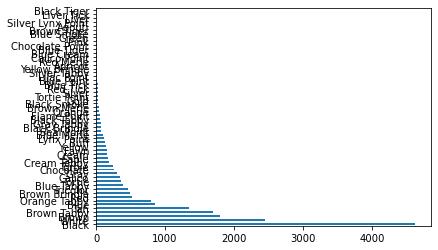

In [28]:
df=XdataSet['color_type'].value_counts().plot(kind='barh')
df.plot(figsize=(20,20))

In [25]:
XdataSet.dtypes

condition     float64
color_type     object
length(m)     float64
height(cm)    float64
X1              int64
X2              int64
diffDate        int64
dtype: object

<AxesSubplot:>

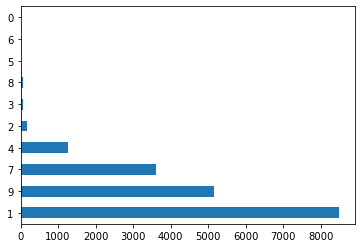

In [40]:
dataset['X2'].value_counts().plot(kind='barh')

<AxesSubplot:>

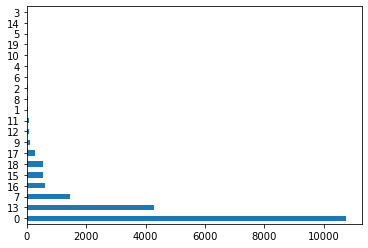

In [41]:
dataset['X1'].value_counts().plot(kind='barh')

In [59]:
# XdataSet["color_type"].replace(coloursDict,inplace=True)
# XdataSet["length*height"]=XdataSet["length(m)"]*XdataSet["height(cm)"]
XdataSet["diffDate"]=diffDateList

In [64]:
test = pd.read_csv("Dataset/test.csv")

In [65]:
test

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7
...,...,...,...,...,...,...,...,...,...
8067,ANSL_66809,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,Brown,0.82,36.08,13,9
8068,ANSL_59041,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,Tan,0.49,27.54,13,9
8069,ANSL_60034,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,Black,0.98,37.19,0,7
8070,ANSL_58066,2016-06-28 00:00:00,2017-07-20 18:19:00,NaN,Black,0.79,23.83,0,2


In [79]:
train=dataRaw
train.drop(['breed_category','pet_category'],axis=1)
dataset = pd.concat([train.drop(['breed_category','pet_category'],axis=1),test])
dataset['issue_date'] = pd.to_datetime(dataset['issue_date'])
dataset['listing_date'] = pd.to_datetime(dataset['listing_date'])
dataset['duration'] = (dataset['listing_date'] - dataset['issue_date']).dt.days  
dataset = dataset.drop(['pet_id','issue_date','listing_date'],axis=1)
dataset 

,condition,color_type,length(m),height(cm),X1,X2,duration
0,2.0,Brown Tabby,0.80,7.78,13,9,73
1,1.0,White,0.72,14.19,13,9,1862
2,3.0,Brown,0.15,40.90,15,4,752
3,1.0,White,0.62,17.82,0,1,755
4,2.0,Black,0.50,11.06,18,4,52
...,...,...,...,...,...,...,...
8067,2.0,Brown,0.82,36.08,13,9,394
8068,0.0,Tan,0.49,27.54,13,9,798
8069,0.0,Black,0.98,37.19,0,7,393
8070,NaN,Black,0.79,23.83,0,2,387


       condition  length_range  height_range  duration_range  color_number  \
8072         0.0             4             4               3             2   
8073         2.0             3             4               1            38   
8074         2.0             2             3               4             7   
8075         0.0             4             2               1            21   
8076         0.0             3             2               4            40   
...          ...           ...           ...             ...           ...   
18829        2.0             2             3               3            52   
18830        1.0             3             1               2            15   
18831        0.0             4             3               5            22   
18832        0.0             3             4               2            48   
18833        0.0             4             3               4            15   

       X1  X2  
8072    0   7  
8073   18   4  
8074    0   1  

c:\users\sachi\anaconda3\envs\tensorenv1\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<AxesSubplot:>

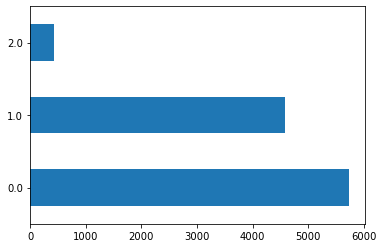

In [50]:
from sklearn.linear_model import LogisticRegression
X_tr, y_tr = dataset.iloc[:len(dataCut)], dataCut['breed_category']
X_test = dataset.iloc[len(dataRaw):]
print(X_test)
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_tr, y_tr)
y_LR = LR.predict(X_test)
pd.DataFrame(y_LR, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [80]:
dataset.fillna(value=3,inplace=True)

In [81]:
dataset

,condition,color_type,length(m),height(cm),X1,X2,duration
0,2.0,Brown Tabby,0.80,7.78,13,9,73
1,1.0,White,0.72,14.19,13,9,1862
2,3.0,Brown,0.15,40.90,15,4,752
3,1.0,White,0.62,17.82,0,1,755
4,2.0,Black,0.50,11.06,18,4,52
...,...,...,...,...,...,...,...
8067,2.0,Brown,0.82,36.08,13,9,394
8068,0.0,Tan,0.49,27.54,13,9,798
8069,0.0,Black,0.98,37.19,0,7,393
8070,3.0,Black,0.79,23.83,0,2,387


In [82]:
XdataSet

,condition,color_type,length(m),height(cm),X1,X2,diffDate,length_range,height_range,duration_range,color_number
0,2.0,Brown Tabby,0.80,7.78,13,9,73,4,1,1,18
1,1.0,White,0.72,14.19,13,9,1862,3,1,4,53
2,3.0,Brown,0.15,40.90,15,4,752,1,4,3,15
3,1.0,White,0.62,17.82,0,1,755,3,2,3,53
4,2.0,Black,0.50,11.06,18,4,52,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
18829,2.0,Tricolor,0.44,27.36,0,1,407,2,3,3,52
18830,3.0,Brown,0.73,14.25,15,4,386,3,1,2,15
18831,0.0,Calico Point,0.99,28.13,13,9,2954,4,3,5,22
18832,0.0,Tan,0.55,44.82,13,9,272,3,4,2,48


In [76]:
YdataSet

,breed_category,pet_category
0,0.0,1
1,0.0,2
2,2.0,4
3,0.0,2
4,0.0,1
...,...,...
18829,0.0,2
18830,2.0,4
18831,1.0,1
18832,1.0,2


In [51]:
a=zip(YdataSet["breed_category"].values.astype('int'),YdataSet["pet_category"].values)
a=list(a)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset,YdataSet,test_size=0.05)

NameError: name 'dataSet' is not defined

In [53]:
in_dim = X_train.shape[1]
out_dim = y_train.shape[1]


In [83]:
X_train

,condition,color_type,length(m),height(cm),X1,X2,diffDate,length_range,height_range,duration_range,color_number
3583,2.0,Orange Tabby,0.17,49.77,18,4,65,1,4,1,38
13885,0.0,Black,0.94,24.84,7,1,721,4,2,3,2
11883,0.0,Fawn,0.33,10.25,0,1,1933,2,1,4,27
15358,2.0,Black,0.27,26.61,17,9,163,2,2,2,2
16282,1.0,Brown Tabby,0.70,5.52,7,1,118,3,1,1,18
...,...,...,...,...,...,...,...,...,...,...,...
7579,2.0,White,0.64,12.81,13,9,386,3,1,2,53
657,0.0,Tortie,0.62,28.16,7,1,87,3,3,1,50
11977,0.0,Black,0.56,49.12,0,1,816,3,4,3,2
13086,0.0,Torbie,0.48,38.75,0,1,774,2,3,3,49


In [131]:
y_train

,breed_category,pet_category
4060,1.0,2
3257,0.0,2
16987,1.0,2
2223,1.0,1
3588,1.0,1
...,...,...
9666,1.0,2
1932,0.0,2
11431,1.0,2
4097,2.0,4


In [132]:
YforIsolation1=y_train["breed_category"]
YforIsolation2=y_train["pet_category"]

In [133]:
YforIsolation1test=y_test["breed_category"]
YforIsolation2test=y_test["pet_category"]

In [26]:
import tensorflow as tf
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

In [94]:
model = Sequential()
model.add(Dense(100, input_dim=in_dim, activation="relu"))
model.add(Dense(88,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")

In [134]:
#for isolated prediction
model2 = Sequential()
model2.add(Dense(100, input_dim=in_dim, activation="relu"))
model2.add(Dense(88,activation='relu'))
model2.add(Dense(50,activation='relu'))
model2.add(Dense(40,activation='relu'))
model2.add(Dense(16,activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(1))
model2.compile(loss="mse", optimizer="adam")

In [135]:
#for isolated prediction
model3 = Sequential()
model3.add(Dense(100, input_dim=in_dim, activation="relu"))
model3.add(Dense(88,activation='relu'))
model3.add(Dense(50,activation='relu'))
model3.add(Dense(40,activation='relu'))
model3.add(Dense(16,activation='relu'))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(1))
model3.compile(loss="mse", optimizer="adam")

In [28]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         batch_size=70,epochs=300)

Train on 15067 samples, validate on 3767 samples
Epoch 1/300
15067/15067 [==============================] - 23s 1ms/step - loss: 0.8738 - val_loss: 0.7595
Epoch 2/300
15067/15067 [==============================] - 7s 465us/step - loss: 0.5287 - val_loss: 0.4949
Epoch 3/300
15067/15067 [==============================] - 7s 476us/step - loss: 0.5050 - val_loss: 0.4597
Epoch 4/300
15067/15067 [==============================] - 7s 466us/step - loss: 0.4691 - val_loss: 0.4245
Epoch 5/300
15067/15067 [==============================] - 8s 536us/step - loss: 0.4535 - val_loss: 0.4215
Epoch 6/300
15067/15067 [==============================] - 7s 450us/step - loss: 0.4301 - val_loss: 0.4650
Epoch 7/300
15067/15067 [==============================] - 7s 486us/step - loss: 0.4153 - val_loss: 0.5291
Epoch 8/300
15067/15067 [==============================] - 9s 578us/step - loss: 0.4336 - val_loss: 0.4957
Epoch 9/300
15067/15067 [==============================] - 8s 547us/step - loss: 0.3854 - val_lo

15067/15067 [==============================] - 7s 481us/step - loss: 0.1646 - val_loss: 0.2167
Epoch 152/300
15067/15067 [==============================] - 7s 482us/step - loss: 0.1679 - val_loss: 0.1813
Epoch 153/300
15067/15067 [==============================] - 8s 508us/step - loss: 0.1680 - val_loss: 0.1795
Epoch 154/300
15067/15067 [==============================] - 7s 486us/step - loss: 0.1633 - val_loss: 0.1885
Epoch 155/300
15067/15067 [==============================] - 7s 488us/step - loss: 0.1649 - val_loss: 0.1769
Epoch 156/300
15067/15067 [==============================] - 7s 485us/step - loss: 0.1593 - val_loss: 0.1752
Epoch 157/300
15067/15067 [==============================] - 8s 517us/step - loss: 0.1646 - val_loss: 0.1790
Epoch 158/300
15067/15067 [==============================] - 7s 474us/step - loss: 0.1691 - val_loss: 0.1785
Epoch 159/300
15067/15067 [==============================] - 7s 497us/step - loss: 0.1804 - val_loss: 0.1776
Epoch 160/300
15067/15067 [======

In [136]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
model2.fit(x=X_train,y=YforIsolation1,
         validation_data=(X_test,YforIsolation1test),
         batch_size=100,epochs=300)

Train on 17892 samples, validate on 942 samples
Epoch 1/300
17892/17892 [==============================] - 20s 1ms/step - loss: 11.2640 - val_loss: 0.5580
Epoch 2/300
17892/17892 [==============================] - 6s 330us/step - loss: 0.4364 - val_loss: 0.4080
Epoch 3/300
17892/17892 [==============================] - 6s 328us/step - loss: 0.4364 - val_loss: 0.4146
Epoch 4/300
17892/17892 [==============================] - 6s 329us/step - loss: 0.3823 - val_loss: 0.5326
Epoch 5/300
17892/17892 [==============================] - 6s 327us/step - loss: 0.4324 - val_loss: 0.3156
Epoch 6/300
17892/17892 [==============================] - 6s 329us/step - loss: 0.7606 - val_loss: 0.4602
Epoch 7/300
17892/17892 [==============================] - 6s 327us/step - loss: 0.4659 - val_loss: 0.5220
Epoch 8/300
17892/17892 [==============================] - 6s 326us/step - loss: 0.3943 - val_loss: 0.3421
Epoch 9/300
17892/17892 [==============================] - 6s 326us/step - loss: 0.4260 - val_lo

17892/17892 [==============================] - 6s 325us/step - loss: 0.1062 - val_loss: 0.1087
Epoch 152/300
17892/17892 [==============================] - 6s 322us/step - loss: 0.1151 - val_loss: 0.1122
Epoch 153/300
17892/17892 [==============================] - 6s 322us/step - loss: 0.1072 - val_loss: 0.1054
Epoch 154/300
17892/17892 [==============================] - 6s 324us/step - loss: 0.1115 - val_loss: 0.1022
Epoch 155/300
17892/17892 [==============================] - 6s 325us/step - loss: 0.1032 - val_loss: 0.0983
Epoch 156/300
17892/17892 [==============================] - 6s 327us/step - loss: 0.1131 - val_loss: 0.1278
Epoch 157/300
17892/17892 [==============================] - 6s 324us/step - loss: 0.1157 - val_loss: 0.1005
Epoch 158/300
17892/17892 [==============================] - 6s 323us/step - loss: 0.1054 - val_loss: 0.1038
Epoch 159/300
17892/17892 [==============================] - 6s 328us/step - loss: 0.1026 - val_loss: 0.1078
Epoch 160/300
17892/17892 [======

17892/17892 [==============================] - ETA: 0s - loss: 0.098 - 6s 325us/step - loss: 0.0982 - val_loss: 0.1057
Epoch 227/300
17892/17892 [==============================] - 6s 324us/step - loss: 0.1004 - val_loss: 0.1115
Epoch 228/300
17892/17892 [==============================] - 6s 324us/step - loss: 0.0999 - val_loss: 0.1080
Epoch 229/300
17892/17892 [==============================] - 6s 324us/step - loss: 0.0996 - val_loss: 0.1067
Epoch 230/300
17892/17892 [==============================] - 6s 326us/step - loss: 0.1143 - val_loss: 0.1116
Epoch 231/300
17892/17892 [==============================] - 6s 323us/step - loss: 0.0981 - val_loss: 0.1152
Epoch 232/300
17892/17892 [==============================] - 6s 323us/step - loss: 0.1018 - val_loss: 0.1138
Epoch 233/300
17892/17892 [==============================] - 6s 326us/step - loss: 0.0985 - val_loss: 0.1223
Epoch 234/300
17892/17892 [==============================] - 6s 324us/step - loss: 0.1068 - val_loss: 0.1104
Epoch 235

In [137]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
model3.fit(x=X_train,y=YforIsolation2,
         validation_data=(X_test,YforIsolation2test),
         batch_size=100,epochs=300)

Train on 17892 samples, validate on 942 samples
Epoch 1/300
17892/17892 [==============================] - 6s 330us/step - loss: 3.8021 - val_loss: 0.7767
Epoch 2/300
17892/17892 [==============================] - 6s 325us/step - loss: 0.7661 - val_loss: 0.7059
Epoch 3/300
17892/17892 [==============================] - 6s 326us/step - loss: 0.6691 - val_loss: 0.6358
Epoch 4/300
17892/17892 [==============================] - 6s 327us/step - loss: 0.5953 - val_loss: 0.5547
Epoch 5/300
17892/17892 [==============================] - 6s 323us/step - loss: 0.5873 - val_loss: 0.6540
Epoch 6/300
17892/17892 [==============================] - 6s 326us/step - loss: 0.5468 - val_loss: 0.5659
Epoch 7/300
17892/17892 [==============================] - 6s 324us/step - loss: 0.4932 - val_loss: 0.5781
Epoch 8/300
17892/17892 [==============================] - 6s 327us/step - loss: 0.4918 - val_loss: 0.4642
Epoch 9/300
17892/17892 [==============================] - 6s 324us/step - loss: 0.4792 - val_lo

17892/17892 [==============================] - 6s 321us/step - loss: 0.2185 - val_loss: 0.2440
Epoch 152/300
17892/17892 [==============================] - 6s 323us/step - loss: 0.2201 - val_loss: 0.2493
Epoch 153/300
17892/17892 [==============================] - 6s 326us/step - loss: 0.2211 - val_loss: 0.2390
Epoch 154/300
17892/17892 [==============================] - 6s 322us/step - loss: 0.2194 - val_loss: 0.2646
Epoch 155/300
17892/17892 [==============================] - 6s 323us/step - loss: 0.2173 - val_loss: 0.2756
Epoch 156/300
17892/17892 [==============================] - 6s 326us/step - loss: 0.2250 - val_loss: 0.2788
Epoch 157/300
17892/17892 [==============================] - 6s 323us/step - loss: 0.2175 - val_loss: 0.2623
Epoch 158/300
17892/17892 [==============================] - 6s 322us/step - loss: 0.2154 - val_loss: 0.2518
Epoch 159/300
17892/17892 [==============================] - 6s 324us/step - loss: 0.2162 - val_loss: 0.2533
Epoch 160/300
17892/17892 [======

17892/17892 [==============================] - 6s 325us/step - loss: 0.2080 - val_loss: 0.2341
Epoch 227/300
17892/17892 [==============================] - 6s 322us/step - loss: 0.2041 - val_loss: 0.2625
Epoch 228/300
17892/17892 [==============================] - 6s 323us/step - loss: 0.2057 - val_loss: 0.2644
Epoch 229/300
17892/17892 [==============================] - 6s 323us/step - loss: 0.2038 - val_loss: 0.2541
Epoch 230/300
17892/17892 [==============================] - 6s 323us/step - loss: 0.2022 - val_loss: 0.2539
Epoch 231/300
17892/17892 [==============================] - 6s 323us/step - loss: 0.2070 - val_loss: 0.2487
Epoch 232/300
17892/17892 [==============================] - 6s 322us/step - loss: 0.2031 - val_loss: 0.2365
Epoch 233/300
17892/17892 [==============================] - 6s 327us/step - loss: 0.2294 - val_loss: 0.2482
Epoch 234/300
17892/17892 [==============================] - 6s 323us/step - loss: 0.2116 - val_loss: 0.2385
Epoch 235/300
17892/17892 [======

In [80]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, YforIsolation2)
yt1 = regr_1.predict(X_test)
print(yt1)
yt1 = np.round(yt1)
print(yt1)
print(set(yt1))

[1.         1.81466266 1.81466266 ... 1.98519515 1.81466266 2.09213251]
[1. 2. 2. ... 2. 2. 2.]
{1.0, 2.0, 4.0}


<AxesSubplot:>

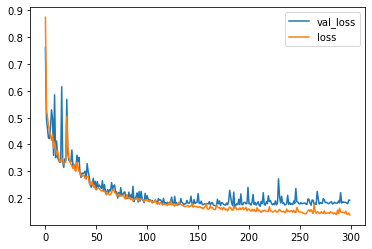

In [29]:
losses = pd.DataFrame(model.history.history)
losses.plot()

<AxesSubplot:>

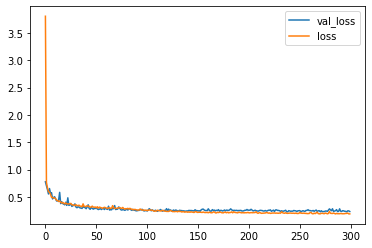

In [138]:
losses = pd.DataFrame(model3.history.history)
losses.plot()

<AxesSubplot:>

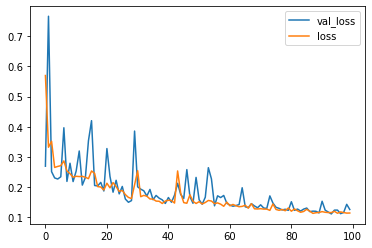

In [61]:
losses = pd.DataFrame(model2.history.history)
losses.plot()

In [84]:
testingDataRaw = dataRaw = pd.read_csv("Dataset/test.csv")

In [89]:
testingDataRaw

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7
...,...,...,...,...,...,...,...,...,...
8067,ANSL_66809,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,Brown,0.82,36.08,13,9
8068,ANSL_59041,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,Tan,0.49,27.54,13,9
8069,ANSL_60034,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,Black,0.98,37.19,0,7
8070,ANSL_58066,2016-06-28 00:00:00,2017-07-20 18:19:00,NaN,Black,0.79,23.83,0,2


In [86]:
testingDataCut=testingDataRaw.drop(["pet_id","issue_date","listing_date"],axis=1)

In [87]:
testingDataCut["color_type"].replace(coloursDict,inplace=True)

In [88]:
testingDataCut

,condition,color_type,length(m),height(cm),X1,X2
0,0.0,3,0.87,42.73,0,7
1,1.0,14,0.06,6.71,0,1
2,1.0,3,0.24,41.21,0,7
3,1.0,3,0.29,8.46,7,1
4,1.0,2,0.71,30.92,0,7
...,...,...,...,...,...,...
8067,2.0,2,0.82,36.08,13,9
8068,0.0,16,0.49,27.54,13,9
8069,0.0,3,0.98,37.19,0,7
8070,NaN,3,0.79,23.83,0,2


In [144]:
testingDataCut.isnull().sum()


condition     619
color_type      0
length(m)       0
height(cm)      0
X1              0
X2              0
dtype: int64

In [145]:
meanOfCondition=(testingDataCut["condition"]).mean()

In [146]:
dateTest2=testingDataRaw["issue_date"]
dateTest1=testingDataRaw["listing_date"]

In [147]:
dateT2Converter(dateTest2)
dateTConverter(dateTest1)

In [148]:
dateTest2List

[datetime.datetime(2005, 8, 17, 0, 0),
 datetime.datetime(2018, 11, 15, 0, 0),
 datetime.datetime(2012, 10, 11, 0, 0),
 datetime.datetime(2015, 2, 13, 0, 0),
 datetime.datetime(2017, 1, 18, 0, 0),
 datetime.datetime(2016, 7, 4, 0, 0),
 datetime.datetime(2014, 9, 2, 0, 0),
 datetime.datetime(2016, 8, 1, 0, 0),
 datetime.datetime(2018, 6, 28, 0, 0),
 datetime.datetime(2016, 8, 25, 0, 0),
 datetime.datetime(2016, 3, 19, 0, 0),
 datetime.datetime(2013, 9, 1, 0, 0),
 datetime.datetime(2013, 6, 29, 0, 0),
 datetime.datetime(2017, 7, 21, 0, 0),
 datetime.datetime(2010, 9, 28, 0, 0),
 datetime.datetime(2015, 8, 28, 0, 0),
 datetime.datetime(2016, 6, 7, 0, 0),
 datetime.datetime(2018, 12, 31, 0, 0),
 datetime.datetime(2015, 3, 13, 0, 0),
 datetime.datetime(2015, 12, 25, 0, 0),
 datetime.datetime(2018, 3, 6, 0, 0),
 datetime.datetime(2017, 3, 25, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2015, 4, 5, 0, 0),
 datetime.datetime(2015, 8, 28, 0, 0),
 datetime.datetime(2018, 6, 4

In [149]:
dateTestList

[datetime.datetime(2017, 9, 7, 15, 35),
 datetime.datetime(2019, 5, 8, 17, 24),
 datetime.datetime(2018, 4, 2, 16, 51),
 datetime.datetime(2018, 4, 6, 7, 25),
 datetime.datetime(2018, 4, 26, 13, 42),
 datetime.datetime(2017, 7, 28, 19, 22),
 datetime.datetime(2016, 11, 22, 10, 56),
 datetime.datetime(2018, 2, 14, 16, 46),
 datetime.datetime(2018, 9, 5, 9, 56),
 datetime.datetime(2018, 9, 17, 12, 53),
 datetime.datetime(2017, 4, 11, 15, 41),
 datetime.datetime(2018, 10, 12, 18, 40),
 datetime.datetime(2017, 11, 28, 12, 41),
 datetime.datetime(2017, 10, 5, 17, 31),
 datetime.datetime(2016, 7, 19, 16, 56),
 datetime.datetime(2016, 10, 20, 15, 9),
 datetime.datetime(2016, 9, 22, 17, 48),
 datetime.datetime(2019, 4, 25, 21, 2),
 datetime.datetime(2017, 4, 17, 0, 0),
 datetime.datetime(2016, 7, 16, 10, 8),
 datetime.datetime(2018, 9, 12, 18, 20),
 datetime.datetime(2019, 4, 17, 11, 22),
 datetime.datetime(2019, 3, 31, 15, 39),
 datetime.datetime(2017, 5, 3, 12, 37),
 datetime.datetime(2016, 

In [150]:
diff_in_dateT(dateTestList,dateTest2List)

In [151]:
diffDateListTest

[4404,
 174,
 1999,
 1148,
 463,
 389,
 812,
 562,
 69,
 753,
 388,
 1867,
 1613,
 76,
 2121,
 419,
 107,
 115,
 766,
 204,
 190,
 753,
 89,
 759,
 394,
 308,
 177,
 384,
 604,
 196,
 1849,
 204,
 222,
 1014,
 385,
 386,
 1854,
 753,
 2582,
 1221,
 752,
 454,
 566,
 267,
 1850,
 277,
 984,
 387,
 2213,
 66,
 84,
 116,
 80,
 294,
 58,
 979,
 387,
 66,
 122,
 2944,
 269,
 412,
 3309,
 418,
 105,
 147,
 1203,
 51,
 117,
 83,
 935,
 753,
 342,
 2365,
 519,
 115,
 3680,
 4776,
 754,
 388,
 1483,
 445,
 386,
 28,
 821,
 762,
 407,
 2265,
 1848,
 911,
 44,
 1220,
 759,
 81,
 185,
 265,
 117,
 394,
 760,
 386,
 511,
 388,
 1854,
 387,
 3149,
 35,
 663,
 45,
 756,
 102,
 79,
 394,
 86,
 509,
 757,
 86,
 758,
 598,
 1007,
 752,
 838,
 758,
 70,
 391,
 751,
 755,
 771,
 233,
 2214,
 395,
 1118,
 3682,
 3974,
 762,
 538,
 386,
 52,
 1855,
 754,
 756,
 478,
 128,
 1882,
 86,
 351,
 390,
 156,
 953,
 943,
 100,
 1124,
 83,
 728,
 1845,
 93,
 831,
 129,
 98,
 3881,
 774,
 5134,
 1117,
 1045,
 395,
 1

In [152]:
testingDataCut["condition"].fillna(np.around(meanOfCondition),inplace=True)

In [44]:
# testingDataCut["length*height"]=testingDataCut["length(m)"]*testingDataCut["height(cm)"]

In [155]:
testingDataCut

,condition,color_type,length(m),height(cm),X1,X2,diffDate
0,0.0,3,0.87,42.73,0,7,4404
1,1.0,14,0.06,6.71,0,1,174
2,1.0,3,0.24,41.21,0,7,1999
3,1.0,3,0.29,8.46,7,1,1148
4,1.0,2,0.71,30.92,0,7,463
...,...,...,...,...,...,...,...
8067,2.0,2,0.82,36.08,13,9,394
8068,0.0,16,0.49,27.54,13,9,798
8069,0.0,3,0.98,37.19,0,7,393
8070,1.0,3,0.79,23.83,0,2,387


In [154]:
testingDataCut["diffDate"]=diffDateListTest

In [156]:
predictionoftest=model.predict(testingDataCut)

ValueError: Error when checking input: expected dense_43_input to have shape (8,) but got array with shape (7,)

In [49]:
p=np.around(predictionoftest)

In [50]:
np.savetxt("foo6.csv", p.astype("int"), delimiter=",")

In [157]:
#for isolated prediction
Isolatedpredictionoftest1=model2.predict(testingDataCut)

In [159]:
pI1=np.around(Isolatedpredictionoftest1)
np.savetxt("part1Isolated.csv",pI1.astype("int"),delimiter=",")

In [160]:
Isolatedpredictionoftest2=model3.predict(testingDataCut)
pI2=np.around(Isolatedpredictionoftest2)
np.savetxt("part2Isolated.csv",pI2.astype("int"),delimiter=",")

In [85]:
yt1 = regr_1.predict(testingDataCut)
print(yt1)
yt1 = np.round(yt1)
print(yt1)
print(set(yt1))

[1.81466266 1.81466266 1.81466266 ... 1.81466266 1.81466266 1.81466266]
[2. 2. 2. ... 2. 2. 2.]
{1.0, 2.0, 4.0}


In [87]:
pI2=np.around(yt1)
np.savetxt("part2Isolated.csv",pI2.astype("int"),delimiter=",")